## 1. Data Understanding and Exploration

In [399]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

#Setting the columns that can be displayed to max as 500 and rows to 300
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300

In [400]:
# reading the dataset
housing_orig = pd.read_csv("train.csv")

In [401]:
#Creating a copy of the data set to to work on
housing = housing_orig.copy(deep= True)

In [402]:
#to have the look at the data
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [403]:
#Statistical description of the dataset
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [404]:
#To understand the columns, shape and data types of various columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [405]:
#To understand the shape 
housing.shape

(1460, 81)

In [406]:
#to find the total no of rows that are null for each column in the dataset
housing.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [407]:
# Checking the percentage of null values in the dataframe 'housing' column-wise
round(100*(housing.isnull().sum()/len(housing.index)), 2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

## 2. Data Imputation / Validation

In [408]:
#Checking the unique values for the columns
housing['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [409]:
#Checking the unique values for the columns
housing['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [410]:
#Checking the unique values for the columns
housing['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

As per the observations of no of rows missing and the data dictionary provided:
1. Pool Qc is having the value of NaN and as per the dictionary we can say that if house doesnt have a pool the value can be NA, which is as equal to NaN , i.e. no pool. and if we see that there is no much of variance in the data as 99.52 % of data is NA/ NaN. So we can drop this column 
2. We can also drop the 'MiscFeature' col, as there wont be much of variance in it also as the null values at 96.30 %, same with Alley @ 93.77%, Fence@80.75%


In [411]:
housing.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis =1, inplace = True)

In [412]:
# Checking the percentage of null values in the dataframe 'housing' column-wise
round(100*(housing.isnull().sum()/len(housing.index)), 2).sort_values(ascending=False)

FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofMatl          0.00
RoofStyle         0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
MSSubClass        0.00
BsmtFinSF1        0.00
Heating           0.00
BsmtFinSF2 

In [413]:
#Checking the values and their distributions of the 'FireplaceQu'
housing['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

As per the data dictionary if there is no fireplace they can have NA. As we can see that there is no NA in the values of the column, we can consider that the rows which were missing the values can be considered as NA.

In [414]:
housing['FireplaceQu'] = housing['FireplaceQu'].replace(np.nan, 'NA')

In [415]:
#Checking the values and their distributions of the 'FireplaceQu'
housing['FireplaceQu'].value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [416]:
housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

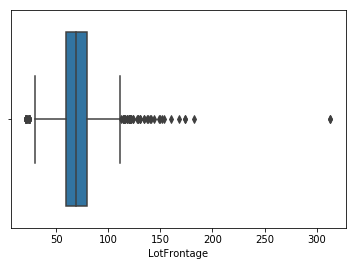

In [417]:
 #To understand if thre are any outliers in the column
sns.boxplot('LotFrontage', data = housing)

As we have seen there are so many outliers for the 'LotFrontage' column, we will impute the missing values using the median of the column

In [418]:
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing['LotFrontage'].median())

In [419]:
housing['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
1995.0    18
1964.0    18
1959.0    17
1963.0    16
1990.0    16
1956.0    16
1969.0    15
1979.0    15
1980.0    15
1967.0    15
1988.0    14
1973.0    14
1940.0    14
1920.0    14
1972.0    14
1961.0    13
1971.0    13
1955.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1985.0    10
1981.0    10
1941.0    10
1925.0    10
1989.0    10
1975.0     9
1991.0     9
1939.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1986.0     6
1951.0     6
1926.0     6
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3

In [420]:
import datetime as d
current_year = int(d.datetime.now().year)

In [421]:
#Caluculating the age of the garage based on the year it was built
housing['GarageYrBlt'] = current_year-housing['GarageYrBlt']

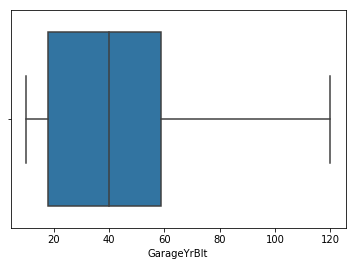

In [422]:
 #To understand if thre are any outliers in the column
sns.boxplot('GarageYrBlt', data = housing)

In [423]:
#There are no outliers so we can impute the data with the mean of the age of which garage was built
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].mean())

In [424]:
#Caluculating the number of years the house was sold from the current year
housing['YrSold'] = current_year-housing['YrSold']

In [425]:
#Caluculating the number of years the house was built from the current year
housing['YearBuilt'] = current_year-housing['YearBuilt']

In [426]:
#Caluculating the number of years the house was built from the current year
housing['YearRemodAdd'] = current_year-housing['YearRemodAdd']

In [427]:
housing['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [428]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
housing['GarageType'] = housing['GarageType'].replace(np.nan, 'NA')

In [429]:
housing['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [430]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
housing['GarageFinish'] = housing['GarageFinish'].replace(np.nan, 'NA')

In [431]:
housing['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [432]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
housing['GarageQual'] = housing['GarageQual'].replace(np.nan, 'NA')

In [433]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
housing['GarageCond'] = housing['GarageCond'].replace(np.nan, 'NA')

In [434]:
housing['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [435]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage. It is also the mode for the data
housing['BsmtExposure'] = housing['BsmtExposure'].replace(np.nan, 'NA')

In [436]:
housing['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [437]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
housing['BsmtFinType2'] = housing['BsmtFinType2'].replace(np.nan, 'NA')

In [438]:
housing['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [439]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
housing['BsmtFinType1'] = housing['BsmtFinType1'].replace(np.nan, 'NA')

In [440]:
housing['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [441]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
housing['BsmtCond'] = housing['BsmtCond'].replace(np.nan, 'NA')

In [442]:
housing['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [443]:
#Replacing NaN values to NA which indicates that the property doesnt have a garage.
housing['BsmtQual'] = housing['BsmtQual'].replace(np.nan, 'NA')

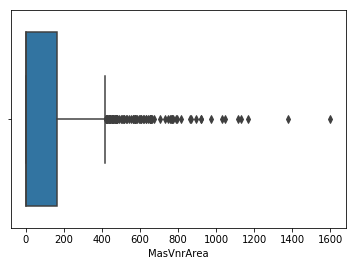

In [444]:
 #To understand if thre are any outliers in the column
sns.boxplot('MasVnrArea', data = housing)

In [445]:
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(housing['MasVnrArea'].median())

In [446]:
housing['MasVnrArea'].isnull().sum()

0

In [447]:
housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [448]:
housing['MasVnrType'].mode()

0    None
dtype: object

In [449]:
#Replacing it with the mode i.e. the None
housing['MasVnrType'] = housing['MasVnrType'].replace(np.nan, 'None')

In [450]:
housing['MasVnrType'].isnull().sum()

0

In [451]:
housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [452]:
#Replacing it with the mode i.e. the SBrkr
housing['Electrical'] = housing['Electrical'].replace(np.nan, 'SBrkr')

In [453]:
# Checking the percentage of null values in the dataframe 'housing' column-wise
round(100*(housing.isnull().sum()/len(housing.index)), 2).sort_values(ascending=False)

SalePrice        0.0
ExterCond        0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
TotalBsmtSF      0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
BsmtUnfSF        0.0
Heating          0.0
SaleCondition    0.0
OpenPorchSF      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF   

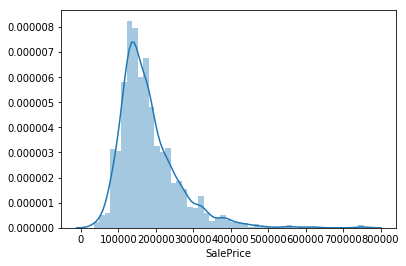

In [454]:
#To see if the 'SalePrice' column is normally distributed to apply regression on it
sns.distplot(housing['SalePrice'])

In [455]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [456]:
#Applying the log transformation technique on the SalePrice column to convert into a normal distributed data
housing['log_value'] = np.log(housing['SalePrice'])

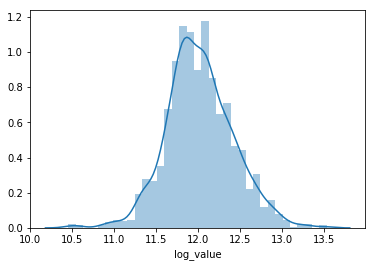

In [457]:
sns.distplot(housing['log_value'])

In [458]:
#converting the MSSubClass into a object class as the current column is being identified as int where in actual its being an categorical
housing['MSSubClass'] = housing['MSSubClass'].astype(object)

In [459]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

In [460]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_value
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,17,17,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,17.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,12,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,44,44,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,44.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,13,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,19,18,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,19.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,12,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,105,50,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,22.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,14,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,20,20,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,20.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,12,WD,Normal,250000,12.429216


Below are the columns which were checked for the variance of the data and found out to be no variant and their percentage of non variance for the respective value is also mentioned in line. will be dropping them.

In [461]:
#(housing['Heating'].value_counts()/len(housing.index))*100 #Can remove no much of a variance : 97 % for GasA
#(housing['SaleCondition'].value_counts()/len(housing.index))*100 #Can remove : 82% varaiance for Normal
#(housing['CentralAir'].value_counts()/len(housing.index))*100 #Can remove : 93.5% varaiance for Y
#(housing['LowQualFinSF'].value_counts()/len(housing.index))*100 #Can remove : 98.2% varaiance for 0
#(housing['KitchenAbvGr'].value_counts()/len(housing.index))*100 #Can remove : 95.3% varaiance for 1
#(housing['Functional'].value_counts()/len(housing.index))*100 #Can remove : 93.1% varaiance for Typ
#(housing['SaleType'].value_counts()/len(housing.index))*100 #Can remove : 86% varaiance for WD
#MoSold might not be a highly influential factor so we can drop it
#(housing['MiscVal'].value_counts()/len(housing.index))*100 #Can remove : 96% varaiance for 0 
#(housing['PoolArea'].value_counts()/len(housing.index))*100 #Can remove : 99% varaiance for 0 
#(housing['ScreenPorch'].value_counts()/len(housing.index))*100 #Can remove : 92% varaiance for 0 
#(housing['3SsnPorch'].value_counts()/len(housing.index))*100 #Can remove : 98% varaiance for 0
#(housing['PavedDrive'].value_counts()/len(housing.index))*100 #Can remove : 92% varaiance for Y
#(housing['PavedDrive'].value_counts()/len(housing.index))*100 #Can remove : 92% varaiance for Y
#(housing['EnclosedPorch'].value_counts()/len(housing.index))*100 #Can remove : 86% varaiance for Y
#(housing['BsmtFinSF2'].value_counts()/len(housing.index))*100 #Can remove : 88% varaiance for 0
#(housing['Condition2'].value_counts()/len(housing.index))*100 #Can remove : 98% varaiance for Norm
#(housing['BldgType'].value_counts()/len(housing.index))*100 #Can remove : 84% varaiance for 1Fam
#(housing['RoofStyle'].value_counts()/len(housing.index))*100 #Can remove : 78% varaiance for Gable
#(housing['RoofMatl'].value_counts()/len(housing.index))*100 #Can remove : 98% varaiance for CompShg
#(housing['ExterCond'].value_counts()/len(housing.index))*100 #Can remove : 87% varaiance for TA
#(housing['Utilities'].value_counts()/len(housing.index))*100 #Can remove : 99.9% varaiance for AllPub
#(housing['Electrical'].value_counts()/len(housing.index))*100 #Can remove : 99.9% varaiance for SBrkr
#(housing['BsmtCond'].value_counts()/len(housing.index))*100 #Can remove : 90% varaiance for TA
#(housing['BsmtFinType2'].value_counts()/len(housing.index))*100 #Can remove : 90% varaiance for Unf
#(housing['GarageQual'].value_counts()/len(housing.index))*100 #Can remove : 89% varaiance for TA
#(housing['GarageCond'].value_counts()/len(housing.index))*100 #Can remove : 90% varaiance for TA
#'Heating','SaleCondition', 'CentralAir', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'SaleType', 'MoSold', 'MiscVal', 'PoolArea', 
#'ScreenPorch', '3SsnPorch', 'PavedDrive', 'EnclosedPorch', 'BsmtFinSF2', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 
#'ExterCond', 'Utilities', 'Electrical', 'BsmtCond', 'BsmtFinType2', 'GarageQual', 'GarageCond'

Have checked the Percentage variance for the columns, written the how much % of the values are same so will be dropping the 
columns identified respectively

In [462]:
housing_orig.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [463]:
#Dropping the columns
housing.drop(['Heating','SaleCondition', 'CentralAir', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'SaleType', 'MoSold', 'MiscVal', 'PoolArea','ScreenPorch', '3SsnPorch', 'PavedDrive', 'EnclosedPorch', 'BsmtFinSF2', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl','ExterCond', 'Utilities', 'Electrical', 'BsmtCond', 'BsmtFinType2', 'GarageQual', 'GarageCond'], axis =1, inplace = True)

In [464]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'YrSold', 'SalePrice', 'log_value'],
      dtype='object')

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [465]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,log_value
0,1,65.0,8450,7,5,17,17,196.0,706,150,856,856,854,1710,1,0,2,1,3,8,0,17.0,2,548,0,61,12,208500,12.247694
1,2,80.0,9600,6,8,44,44,0.0,978,284,1262,1262,0,1262,0,1,2,0,3,6,1,44.0,2,460,298,0,13,181500,12.109011
2,3,68.0,11250,7,5,19,18,162.0,486,434,920,920,866,1786,1,0,2,1,3,6,1,19.0,2,608,0,42,12,223500,12.317167
3,4,60.0,9550,7,5,105,50,0.0,216,540,756,961,756,1717,1,0,1,0,3,7,1,22.0,3,642,0,35,14,140000,11.849398
4,5,84.0,14260,8,5,20,20,350.0,655,490,1145,1145,1053,2198,1,0,2,1,4,9,1,20.0,3,836,192,84,12,250000,12.429216


In [466]:
housing['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [467]:
housing['BsmtHalfBath'].value_counts()


0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

Let's now make a correlation/ heat map and observe linear relationships.

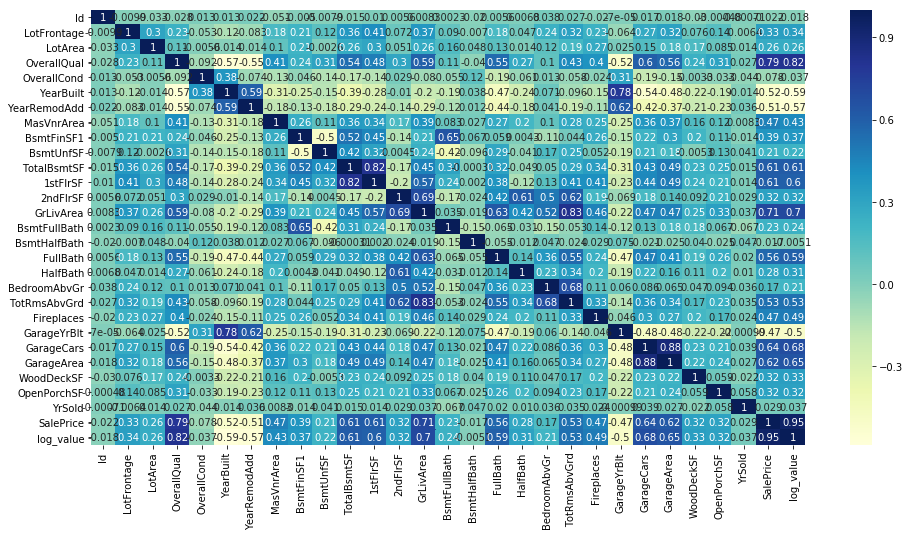

In [468]:

# correlation matrix
cor = housing_numeric.corr()

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [469]:
cor*100

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,log_value
Id,100.000000,-0.992147,-3.322552,-2.836475,1.260892,1.271272,2.199764,-5.107140,-0.502405,-0.793970,-1.541457,1.049604,0.558985,0.827276,0.228856,-2.015475,0.558745,0.678381,3.771855,2.723872,-1.977163,-0.007026,1.656968,1.763378,-2.964320,-0.047691,-0.071179,-2.191672,-1.794238
LotFrontage,-0.992147,100.000000,30.452217,23.481226,-5.328067,-11.668539,-8.334809,17.846857,21.436661,12.409821,36.347231,41.377253,7.238802,36.800744,9.034287,-0.697899,18.053379,4.722164,23.684003,32.051766,23.322064,-6.437009,26.953925,32.351093,7.554211,13.701356,-0.638043,33.477085,33.529150
LotArea,-3.322552,30.452217,100.000000,10.580574,-0.563627,-1.422765,-1.378843,10.332051,21.410313,-0.261836,26.083313,29.947458,5.098595,26.311617,15.815453,4.804557,12.603063,1.425947,11.968991,19.001478,27.136401,2.481205,15.487074,18.040276,17.169769,8.477381,1.426141,26.384335,25.731989
OverallQual,-2.836475,23.481226,10.580574,100.000000,-9.193234,-57.232277,-55.068392,40.725212,23.966597,30.815893,53.780850,47.622383,29.549288,59.300743,11.109779,-4.015016,55.059971,27.345810,10.167636,42.745234,39.676504,-51.801821,60.067072,56.202176,23.892339,30.881882,2.734671,79.098160,81.718442
OverallCond,1.260892,-5.328067,-0.563627,-9.193234,100.000000,37.598320,-7.374150,-12.569363,-4.623086,-13.684057,-17.109751,-14.420278,2.894212,-7.968587,-5.494152,11.782092,-19.414949,-6.076933,1.298006,-5.758317,-2.381998,30.616876,-18.575751,-15.152137,-0.333370,-3.258881,-4.394975,-7.785589,-3.686799
YearBuilt,1.271272,-11.668539,-1.422765,-57.232277,37.598320,100.000000,59.285498,-31.160011,-24.950320,-14.904039,-39.145200,-28.198586,-1.030766,-19.900971,-18.759855,3.816181,-46.827079,-24.265591,7.065122,-9.558913,-14.771640,78.055499,-53.785009,-47.895382,-22.488014,-18.868584,-1.361768,-52.289733,-58.657024
YearRemodAdd,2.199764,-8.334809,-1.378843,-55.068392,-7.374150,59.285498,100.000000,-17.652918,-12.845055,-18.113309,-29.106558,-24.037927,-14.002378,-28.738852,-11.946988,1.233703,-43.904648,-18.333061,4.058093,-19.173982,-11.258132,61.812984,-42.062215,-37.159981,-20.572592,-22.629763,3.574325,-50.710097,-56.560783
MasVnrArea,-5.107140,17.846857,10.332051,40.725212,-12.569363,-31.160011,-17.652918,100.000000,26.125605,11.386216,36.006737,33.985041,17.380000,38.805205,8.301005,2.740266,27.299886,19.910752,10.277452,27.956789,24.701528,-24.617754,36.194457,37.088415,15.999053,12.252833,0.831662,47.261450,42.677513
BsmtFinSF1,-0.502405,21.436661,21.410313,23.966597,-4.623086,-24.950320,-12.845055,26.125605,100.000000,-49.525147,52.239605,44.586266,-13.707899,20.817113,64.921175,6.741848,5.854314,0.426242,-10.735468,4.431562,26.001092,-15.033789,22.405352,29.697039,20.430615,11.176061,-1.435892,38.641981,37.202307
BsmtUnfSF,-0.793970,12.409821,-0.261836,30.815893,-13.684057,-14.904039,-18.113309,11.386216,-49.525147,100.000000,41.535961,31.798744,0.446909,24.025727,-42.290048,-9.580429,28.888606,-4.111753,16.664332,25.064706,5.157488,-18.609843,21.417519,18.330270,-0.531642,12.900541,4.125819,21.447911,22.198505


1. Positive Correlated variable are, i.e with the increase in these variable , sales price is also getting increased:
    OverallQual
    MasVnrArea
    TotalBsmtSF
    1stFlrSF
    GrLivArea
    FullBath
    TotRmsAbvGrd
    GarageCars
    GarageArea
2. Negative correlated variables are, i.e with the increase in these variable , sales price is getting decreased:
    YearBuilt
    YearRemodAdd

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [470]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'YrSold', 'SalePrice', 'log_value'],
      dtype='object')

In [471]:
# split into X and y
X = housing.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'YrSold']]

y = housing['log_value']

In [472]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()


,MSSubClass,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,60,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,NA,Attchd,RFn
1,20,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Story,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn
2,60,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn
3,70,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,2Story,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf
4,60,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn


In [473]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [474]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [475]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [476]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the dataframe is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=171)

In [477]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [478]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [479]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010602,1.200634e-03,0.000800,0.000400,0.0001,{'alpha': 0.0001},-0.095778,-0.097267,-0.104910,-0.091154,-0.098685,-0.097557,0.004461,27,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
1,0.009599,1.348105e-03,0.001000,0.000005,0.001,{'alpha': 0.001},-0.095778,-0.097266,-0.104909,-0.091154,-0.098685,-0.097556,0.004461,26,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
2,0.009200,4.955386e-03,0.000600,0.000490,0.01,{'alpha': 0.01},-0.095780,-0.097255,-0.104903,-0.091150,-0.098682,-0.097552,0.004460,25,-0.078052,-0.067514,-0.072208,-0.079999,-0.077824,-0.075119,0.004605
3,0.006700,1.249221e-03,0.000402,0.000492,0.05,{'alpha': 0.05},-0.095788,-0.097210,-0.104883,-0.091131,-0.098672,-0.097535,0.004458,24,-0.078049,-0.067528,-0.072202,-0.080005,-0.077824,-0.075122,0.004602
4,0.005001,8.609519e-07,0.000400,0.000490,0.1,{'alpha': 0.1},-0.095798,-0.097156,-0.104864,-0.091106,-0.098660,-0.097515,0.004458,23,-0.078044,-0.067545,-0.072195,-0.080013,-0.077824,-0.075124,0.004599


In [480]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010602,1.200634e-03,0.000800,0.000400,0.0001,{'alpha': 0.0001},-0.095778,-0.097267,-0.104910,-0.091154,-0.098685,-0.097557,0.004461,27,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
1,0.009599,1.348105e-03,0.001000,0.000005,0.001,{'alpha': 0.001},-0.095778,-0.097266,-0.104909,-0.091154,-0.098685,-0.097556,0.004461,26,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
2,0.009200,4.955386e-03,0.000600,0.000490,0.01,{'alpha': 0.01},-0.095780,-0.097255,-0.104903,-0.091150,-0.098682,-0.097552,0.004460,25,-0.078052,-0.067514,-0.072208,-0.079999,-0.077824,-0.075119,0.004605
3,0.006700,1.249221e-03,0.000402,0.000492,0.05,{'alpha': 0.05},-0.095788,-0.097210,-0.104883,-0.091131,-0.098672,-0.097535,0.004458,24,-0.078049,-0.067528,-0.072202,-0.080005,-0.077824,-0.075122,0.004602
4,0.005001,8.609519e-07,0.000400,0.000490,0.1,{'alpha': 0.1},-0.095798,-0.097156,-0.104864,-0.091106,-0.098660,-0.097515,0.004458,23,-0.078044,-0.067545,-0.072195,-0.080013,-0.077824,-0.075124,0.004599
5,0.006000,1.095801e-03,0.000600,0.000490,0.2,{'alpha': 0.2},-0.095814,-0.097054,-0.104834,-0.091053,-0.098638,-0.097477,0.004463,22,-0.078034,-0.067578,-0.072183,-0.080029,-0.077823,-0.075130,0.004591
6,0.008201,1.472005e-03,0.000800,0.000400,0.3,{'alpha': 0.3},-0.095826,-0.096958,-0.104809,-0.090994,-0.098618,-0.097439,0.004472,21,-0.078024,-0.067610,-0.072180,-0.080045,-0.077824,-0.075137,0.004583
7,0.006601,1.020544e-03,0.000600,0.000490,0.4,{'alpha': 0.4},-0.095840,-0.096868,-0.104789,-0.090932,-0.098599,-0.097404,0.004483,20,-0.078014,-0.067641,-0.072177,-0.080061,-0.077826,-0.075144,0.004576
8,0.008601,1.202894e-03,0.000402,0.000492,0.5,{'alpha': 0.5},-0.095857,-0.096783,-0.104773,-0.090867,-0.098582,-0.097371,0.004497,19,-0.078005,-0.067671,-0.072175,-0.080076,-0.077830,-0.075151,0.004569
9,0.008402,1.352067e-03,0.000598,0.000489,0.6,{'alpha': 0.6},-0.095873,-0.096702,-0.104760,-0.090800,-0.098566,-0.097339,0.004512,18,-0.077998,-0.067699,-0.072174,-0.080091,-0.077833,-0.075159,0.004563


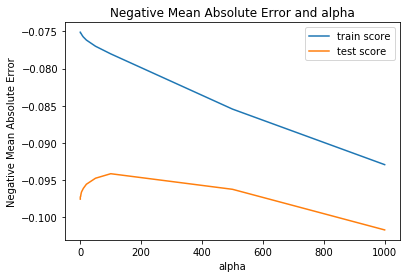

In [481]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [482]:
print("\n The best estimator across ALL searched params:\n",
          model_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          model_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          model_cv.best_params_)


 The best estimator across ALL searched params:
 Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

 The best score across ALL searched params:
 -0.09414186111953389

 The best parameters across ALL searched params:
 {'alpha': 100}


In [483]:
#Using the best hyper parameter in the ridge Regression
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_


array([-6.80271628e-03,  1.73903140e-02,  6.28766532e-02,  3.74476105e-02,
       -2.62568097e-02, -2.31702539e-02,  3.17720331e-03, -1.08348294e-03,
        4.27586345e-03,  9.80665331e-03,  2.83588265e-02,  2.46357923e-02,
        4.07317110e-02,  2.15385517e-02,  3.28665045e-04,  2.28668592e-02,
        2.00444399e-02,  1.09856989e-02,  1.81769787e-02,  8.33989794e-03,
       -5.71667258e-03,  2.84044367e-02,  1.64090567e-02,  1.03088771e-02,
       -1.29182493e-03,  5.57504126e-03, -2.08090297e-02, -2.69343477e-03,
       -4.60225130e-03,  3.38822111e-03, -5.94354412e-03,  9.77909352e-03,
        9.62490904e-03, -3.60753593e-03,  1.39589416e-03, -7.13878412e-03,
       -1.55271464e-02, -2.27202191e-02, -8.27012027e-03, -8.53540264e-03,
        1.40358949e-02,  5.66952369e-03,  2.51479887e-02,  1.13397451e-02,
        6.26970027e-03,  4.66621126e-03, -7.97932606e-03,  2.97957888e-03,
        1.02425215e-02,  1.02343206e-02,  1.72015292e-02,  9.21440782e-03,
       -8.12045004e-03, -

In [484]:
# predict for the training dataset
y_train_pred = ridge.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=np.exp(y_train), y_pred=np.exp(y_train_pred)))

The training accuracy is:
0.8909379138181881


In [485]:
# predict for the test dataset
y_test_pred = ridge.predict(X_test)
print('The testing accuracy is:')
print(metrics.r2_score(y_true=np.exp(y_test), y_pred=np.exp(y_test_pred)))

The testing accuracy is:
0.8873810478530915


The models training and testing accuracy stands at 89.1% and 88.7% which are way nearer and decent enough

In [486]:
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(ridge.coef_)
list(zip(cols, model_parameters))

[('constant', -0.006802716282671836),
 ('LotFrontage', 0.017390314041542898),
 ('LotArea', 0.06287665319187355),
 ('OverallQual', 0.03744761051702555),
 ('OverallCond', -0.02625680969591591),
 ('YearBuilt', -0.023170253884067887),
 ('YearRemodAdd', 0.0031772033133993186),
 ('MasVnrArea', -0.0010834829393460347),
 ('BsmtFinSF1', 0.004275863448854155),
 ('BsmtUnfSF', 0.009806653308973122),
 ('TotalBsmtSF', 0.028358826497363456),
 ('1stFlrSF', 0.024635792299429412),
 ('2ndFlrSF', 0.04073171098883433),
 ('GrLivArea', 0.02153855167800199),
 ('BsmtFullBath', 0.00032866504483121547),
 ('BsmtHalfBath', 0.022866859164804867),
 ('FullBath', 0.020044439942239516),
 ('HalfBath', 0.010985698861737746),
 ('BedroomAbvGr', 0.01817697867783597),
 ('TotRmsAbvGrd', 0.008339897936415333),
 ('Fireplaces', -0.005716672577981407),
 ('GarageYrBlt', 0.028404436695828494),
 ('GarageCars', 0.01640905669093855),
 ('GarageArea', 0.010308877095362058),
 ('WoodDeckSF', -0.0012918249322360102),
 ('OpenPorchSF', 0.005

In [487]:
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(ridge.coef_)
ridge_list = list(zip(cols, model_parameters))

In [488]:
final_pred_ridge = []
for i in range(len(ridge_list)):
    if(ridge_list[i][1]!=0):
        final_pred_ridge.append(ridge_list[i][0])
print('Number of predictors selected by optimal alpha for ridge are:{0}'.format(len(final_pred_ridge)))

Number of predictors selected by optimal alpha for ridge are:170


## Doubling the hyper parameter value for Ridge
Doubling from the optimal value of 100 to 200

In [489]:
alpha_double = 200
ridge_double = Ridge(alpha=alpha_double)

ridge_double.fit(X_train, y_train)
ridge_double.coef_

array([-3.31383403e-03,  1.54900882e-02,  5.64765985e-02,  3.37464530e-02,
       -2.11240193e-02, -2.36658234e-02,  5.56189351e-03,  3.17082642e-03,
        4.60711885e-03,  1.35203870e-02,  2.71465850e-02,  1.97355464e-02,
        3.59552479e-02,  1.90443425e-02,  1.63960334e-04,  2.15225487e-02,
        1.82958265e-02,  1.06932801e-02,  2.01390903e-02,  1.19501884e-02,
       -7.12561134e-03,  2.56884790e-02,  1.81841183e-02,  1.06505247e-02,
        6.08792477e-05,  4.90169818e-03, -2.06651180e-02, -2.37590609e-03,
       -2.87511434e-03,  3.00854403e-03, -1.94014805e-03,  9.80290838e-03,
        7.19613139e-03, -3.10087194e-03,  1.04488721e-03, -6.41514054e-03,
       -1.20377311e-02, -1.84230647e-02, -7.37423955e-03, -8.13649814e-03,
        1.06702726e-02,  3.36431249e-03,  1.72122371e-02,  1.48519560e-03,
        5.60514366e-03,  4.38369090e-03, -8.91127123e-03,  1.55093943e-03,
        8.31710889e-03,  8.23389040e-03,  1.28531505e-02,  9.63692604e-03,
       -6.65888768e-03, -

In [490]:
# predict
y_train_pred_double = ridge_double.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double))


0.909808918012981


In [491]:
rsquare = metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double)
rssbytss = 1-rsquare
rssbytss

0.09019108198701897

In [492]:
y_test_pred = ridge_double.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8783127575513225


In [493]:
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(ridge_double.coef_)
ridge_doble_list = list(zip(cols, model_parameters))

In [494]:
ridge_doble_list

[('constant', -0.0033138340299703737),
 ('LotFrontage', 0.015490088210253416),
 ('LotArea', 0.056476598505113725),
 ('OverallQual', 0.033746452950056266),
 ('OverallCond', -0.021124019318482422),
 ('YearBuilt', -0.023665823421914343),
 ('YearRemodAdd', 0.005561893512113878),
 ('MasVnrArea', 0.003170826415276858),
 ('BsmtFinSF1', 0.004607118849838869),
 ('BsmtUnfSF', 0.013520387048237976),
 ('TotalBsmtSF', 0.027146584954377606),
 ('1stFlrSF', 0.01973554640688937),
 ('2ndFlrSF', 0.035955247914179415),
 ('GrLivArea', 0.019044342543898873),
 ('BsmtFullBath', 0.000163960334491683),
 ('BsmtHalfBath', 0.02152254867205044),
 ('FullBath', 0.01829582653337413),
 ('HalfBath', 0.01069328005687001),
 ('BedroomAbvGr', 0.020139090307311674),
 ('TotRmsAbvGrd', 0.011950188408634002),
 ('Fireplaces', -0.00712561133566898),
 ('GarageYrBlt', 0.02568847904394955),
 ('GarageCars', 0.01818411827035207),
 ('GarageArea', 0.010650524695952521),
 ('WoodDeckSF', 6.0879247741693084e-05),
 ('OpenPorchSF', 0.0049016

In [495]:
final_pred_ridge_double =[]
for i in range(len(ridge_doble_list)):
    if(ridge_doble_list[i][1]!=0):
        final_pred_ridge_double.append(ridge_doble_list[i][0])
print('Number of predictors selected by double the optimal alpha for ridge are:{0}'.format(len(final_pred_ridge_double)))

Number of predictors selected by double the optimal alpha for ridge are:170


## Lasso

In [496]:
# list of alphas to tune
params = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01]}


lasso = Lasso()

# cross validation
model_lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [497]:
cv_results_lasso = pd.DataFrame(model_cv.cv_results_)
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010602,1.200634e-03,0.000800,0.000400,0.0001,{'alpha': 0.0001},-0.095778,-0.097267,-0.104910,-0.091154,-0.098685,-0.097557,0.004461,27,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
1,0.009599,1.348105e-03,0.001000,0.000005,0.001,{'alpha': 0.001},-0.095778,-0.097266,-0.104909,-0.091154,-0.098685,-0.097556,0.004461,26,-0.078053,-0.067511,-0.072209,-0.079997,-0.077824,-0.075119,0.004606
2,0.009200,4.955386e-03,0.000600,0.000490,0.01,{'alpha': 0.01},-0.095780,-0.097255,-0.104903,-0.091150,-0.098682,-0.097552,0.004460,25,-0.078052,-0.067514,-0.072208,-0.079999,-0.077824,-0.075119,0.004605
3,0.006700,1.249221e-03,0.000402,0.000492,0.05,{'alpha': 0.05},-0.095788,-0.097210,-0.104883,-0.091131,-0.098672,-0.097535,0.004458,24,-0.078049,-0.067528,-0.072202,-0.080005,-0.077824,-0.075122,0.004602
4,0.005001,8.609519e-07,0.000400,0.000490,0.1,{'alpha': 0.1},-0.095798,-0.097156,-0.104864,-0.091106,-0.098660,-0.097515,0.004458,23,-0.078044,-0.067545,-0.072195,-0.080013,-0.077824,-0.075124,0.004599


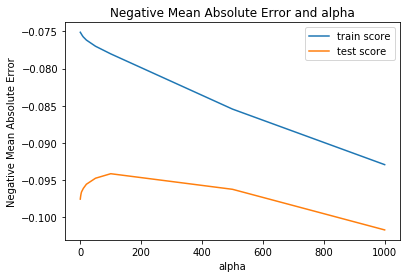

In [498]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [499]:
print("\n The best estimator across ALL searched params:\n",
          model_lasso_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          model_lasso_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          model_lasso_cv.best_params_)


 The best estimator across ALL searched params:
 Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

 The best score across ALL searched params:
 -0.09291709101232978

 The best parameters across ALL searched params:
 {'alpha': 0.001}


In [500]:
alpha_lasso =0.001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [501]:
lasso.coef_

array([-9.99578312e-03,  1.84249397e-02,  7.51006739e-02,  4.17795743e-02,
       -4.75934387e-02, -2.11751767e-02, -0.00000000e+00, -0.00000000e+00,
        4.68766402e-03,  0.00000000e+00,  8.74891105e-05,  0.00000000e+00,
        9.91391956e-02,  2.36554998e-02,  0.00000000e+00,  1.93155608e-02,
        1.68519902e-02,  8.76654530e-03,  9.28262428e-03,  0.00000000e+00,
       -9.31605582e-04,  4.21052728e-02,  5.05697748e-03,  8.98906817e-03,
       -3.73570945e-04,  4.26484769e-03, -2.12996008e-02, -3.01766081e-03,
       -7.45831854e-04,  1.30575747e-03, -1.88064634e-02,  3.05935938e-03,
        3.01643296e-03, -4.10256654e-03,  0.00000000e+00, -7.41564343e-03,
       -1.79686245e-02, -3.42160823e-02, -9.32049888e-03, -8.87856675e-03,
        4.26874672e-02,  2.14062882e-02,  8.84176590e-02,  5.99136884e-02,
        5.03382218e-03,  4.32384060e-03, -6.25009374e-03,  2.25850481e-03,
        1.14876219e-02,  1.29799730e-02,  2.17042536e-02,  7.59250636e-03,
       -7.52751026e-03, -

In [502]:
model_parameters = list(lasso.coef_)
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(lasso.coef_)
lasso_list = list(zip(cols, model_parameters))

In [503]:
lasso_list

[('constant', -0.009995783124817298),
 ('LotFrontage', 0.018424939673390973),
 ('LotArea', 0.07510067387513485),
 ('OverallQual', 0.04177957426537631),
 ('OverallCond', -0.0475934386812589),
 ('YearBuilt', -0.021175176662136745),
 ('YearRemodAdd', -0.0),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', 0.004687664021656259),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 8.748911050118316e-05),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.09913919561888089),
 ('GrLivArea', 0.02365549984606827),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.019315560813582346),
 ('FullBath', 0.01685199023061048),
 ('HalfBath', 0.008766545304624238),
 ('BedroomAbvGr', 0.009282624280083869),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', -0.0009316055822936864),
 ('GarageYrBlt', 0.04210527281376895),
 ('GarageCars', 0.005056977481924695),
 ('GarageArea', 0.008989068165814872),
 ('WoodDeckSF', -0.0003735709451526654),
 ('OpenPorchSF', 0.004264847685300734),
 ('YrSold', -0.021299600844254578),
 ('MSSubClass_30', -0.0030176608129431704),
 ('MSS

In [504]:
#List of all predictors with non zero co-efficients
for i in range(len(a)):
    if(lasso_list[i][1]!=0):
        print(lasso_list[i][0])

constant
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
BsmtFinSF1
TotalBsmtSF
2ndFlrSF
GrLivArea
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
YrSold
MSSubClass_30
MSSubClass_40
MSSubClass_45
MSSubClass_50
MSSubClass_60
MSSubClass_70
MSSubClass_75
MSSubClass_85
MSSubClass_90
MSSubClass_120
MSSubClass_160
MSSubClass_180
MSSubClass_190
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Pave
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Somerst
Neighborhood_St

In [505]:
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

The training accuracy is:
0.9183979804109303
The test accuracy is:
0.8851756193022349


In [506]:
final_pred_lasso =[]
for i in range(len(lasso_list)):
    if(lasso_list[i][1]!=0):
        final_pred_lasso.append(lasso_list[i][0])
print('Number of predictors selected by optimaloptimal alpha for ridge are:{0}'.format(len(final_pred_lasso)))

Number of predictors selected by optimaloptimal alpha for ridge are:127


As seen in the above cell the train and testing accuracy are in good intervals and which are dencent enough

## Double the Alpha for Lasso
Previously the alpha was 0.001, so now we are taking 0.02

In [507]:
lm_double = Lasso(alpha=0.002)
lm_double.fit(X_train, y_train)

# predict
y_train_pred_double = lm_double.predict(X_train)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_double))
y_test_pred_double = lm.predict(X_test)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_double))

The training accuracy is:
0.9114997487189402
The test accuracy is:
0.8851756193022349


In [508]:
model_parameters = list(lm_double.coef_)
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(lm_double.coef_)
a = list(zip(cols, model_parameters))
#List of all predictors with non zero co-efficients

final_pred =[]
for i in range(len(a)):
    if(a[i][1]!=0):
        final_pred.append(a[i][0])
print('Number of predictors selected by double the optimal alpha for lasso are:{0}'.format(len(final_pred)))

Number of predictors selected by double the optimal alpha for lasso are:113


In [509]:
a

[('constant', -0.004924612585877162),
 ('LotFrontage', 0.01731303823621963),
 ('LotArea', 0.08340793685284573),
 ('OverallQual', 0.04219861598715639),
 ('OverallCond', -0.04958387635114405),
 ('YearBuilt', -0.022668907941129805),
 ('YearRemodAdd', 0.0),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', 0.002622684268774103),
 ('BsmtUnfSF', 0.0008811571237404616),
 ('TotalBsmtSF', 0.009361412220262474),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.09141208626563044),
 ('GrLivArea', 0.024520147466809562),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.017443304848615632),
 ('FullBath', 0.014755542866428164),
 ('HalfBath', 0.007733595498511244),
 ('BedroomAbvGr', 0.009847177841288007),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', -0.0),
 ('GarageYrBlt', 0.043193675704733495),
 ('GarageCars', 0.0036005243406502037),
 ('GarageArea', 0.009150986283887379),
 ('WoodDeckSF', -0.0),
 ('OpenPorchSF', 0.0034922449209752577),
 ('YrSold', -0.019077933364936985),
 ('MSSubClass_30', -0.0014515205955695862),
 ('MSSubClass_40', -0

In [510]:
d = len(final_pred)

In [511]:
d

113

In [512]:
n = len(X)

### Removing the top 5 contributors from the lasso regression:

In [513]:
#for the Questions 3 of the part 2 

In [514]:
X_train_new = X_train.drop(['2ndFlrSF', 'MSZoning_RH', 'LotArea', 'MSZoning_RL', 'MSSubClass_190'], axis=1)

In [515]:
X_test_new = X_test.drop(['2ndFlrSF', 'MSZoning_RH', 'LotArea', 'MSZoning_RL', 'MSSubClass_190'], axis=1)

In [516]:
X_train_new.columns

Index(['LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF',
       ...
       'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=166)

In [517]:
model_lasso_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [518]:
cv_results_lasso = pd.DataFrame(model_lasso_cv.cv_results_)

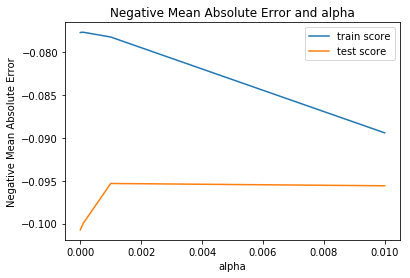

In [519]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [520]:
print("\n The best estimator across ALL searched params:\n",
          model_lasso_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          model_lasso_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          model_lasso_cv.best_params_)


 The best estimator across ALL searched params:
 Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

 The best score across ALL searched params:
 -0.09532218270756157

 The best parameters across ALL searched params:
 {'alpha': 0.001}


In [521]:
alpha_lasso =0.001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [522]:
model_parameters = list(lasso.coef_)
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(lasso.coef_)
lasso_list = list(zip(cols, model_parameters))

In [523]:
lm = Lasso(alpha=0.001)
lm.fit(X_train_new, y_train)

# predict
y_train_pred = lm.predict(X_train_new)
print('The training accuracy is:')
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_new)
print('The test accuracy is:')
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

The training accuracy is:
0.9137709634530005
The test accuracy is:
0.8822024070495238


In [524]:
lasso_list

[('constant', -0.006896900233652806),
 ('LotFrontage', 0.07550896384718872),
 ('LotArea', 0.04466188157885121),
 ('OverallQual', -0.05002667040169353),
 ('OverallCond', -0.019793367920580947),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', -0.0007346334810972969),
 ('MasVnrArea', 0.006163251148203103),
 ('BsmtFinSF1', 0.0),
 ('BsmtUnfSF', 0.00475001790732039),
 ('TotalBsmtSF', 0.09514141329187167),
 ('1stFlrSF', 0.025621220706146013),
 ('2ndFlrSF', -0.0),
 ('GrLivArea', 0.022377880020928057),
 ('BsmtFullBath', 0.019215063289459475),
 ('BsmtHalfBath', 0.008576815952747657),
 ('FullBath', 0.00921494328902137),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('TotRmsAbvGrd', 0.03839247495565958),
 ('Fireplaces', 0.007830786169725788),
 ('GarageYrBlt', 0.011024507439380318),
 ('GarageCars', -0.0006065623478665606),
 ('GarageArea', 0.0045955678831878935),
 ('WoodDeckSF', -0.016114576173749676),
 ('OpenPorchSF', -0.0034945163993902596),
 ('YrSold', -0.0),
 ('MSSubClass_30', 0.009616688535713411),
 ('M

In [525]:
final_lasso_new_pred =[]
for i in range(len(lasso_list)):
    if(lasso_list[i][1]!=0):
        final_lasso_new_pred.append(lasso_list[i][0])
print('Number of predictors selected by double the optimal alpha for lasso are:{0}'.format(len(final_lasso_new_pred)))

Number of predictors selected by double the optimal alpha for lasso are:129
